# Bank Customer Churn Project #
> Goal: The reason of Customer Churn
## 1. Import Package ##

In [133]:
from pyexpat import features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from tensorflow.python.ops.numpy_ops.np_random import random
from tensorflow.python.ops.structured.structured_array_ops import random_shuffle


## 2. Initial Data Exploration ##
    2.1 Read Dataset 

In [4]:
df = pd.read_csv('Bank_Customer_ Churn_Prediction.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [17]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. The Reason of Customer Churn
### 3.1 The Churn rate

In [27]:
churn_rate = sum(df['churn'])/len(df)

print('churn_rate is '+repr(churn_rate*100)+'%')


churn_rate is 20.369999999999997%


Text(0.5, 0, 'Churn Rate ( 0 = Retained, 1 = Churned)')

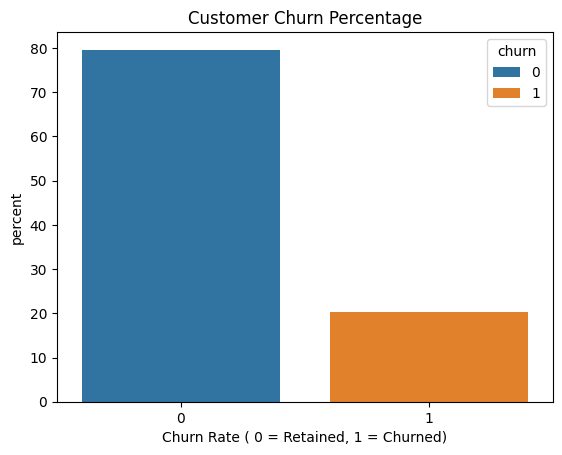

In [84]:
sns.countplot(df, x='churn',stat='percent',hue='churn')
#Add labels
plt.title("Customer Churn Percentage")
plt.xlabel("Churn Rate ( 0 = Retained, 1 = Churned)" )

### 3.2 The Churn number of Different Country

<Axes: xlabel='country', ylabel='count'>

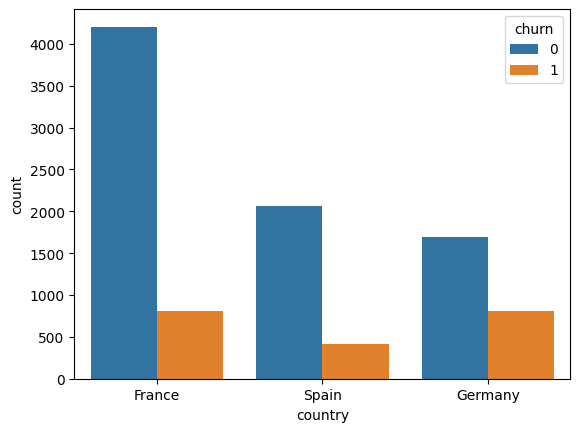

In [81]:
sns.countplot(df,x='country',hue='churn',stat='count')

### 3.3 Find the observations that affect churn
#### 3.3.1 Age 
        The boxplot shows that customer churn is concentrated between 38 and 50

Text(0.5, 1.0, 'Age v.s Churn')

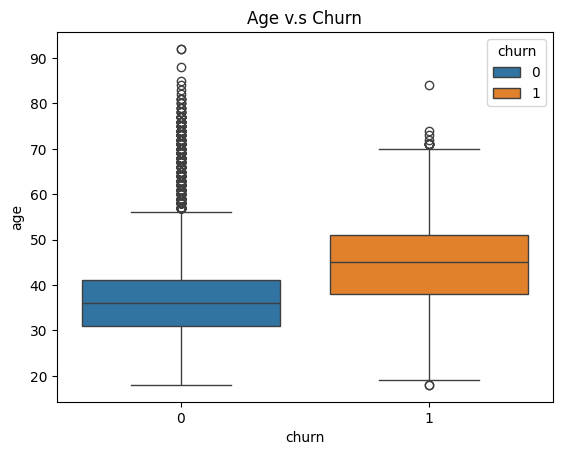

In [75]:
sns.boxplot(y='age',x ='churn',hue='churn',data=df)
#label
plt.title("Age v.s Churn")


#### 3.3.2 Balance v.s Churn 

<Axes: xlabel='churn', ylabel='balance'>

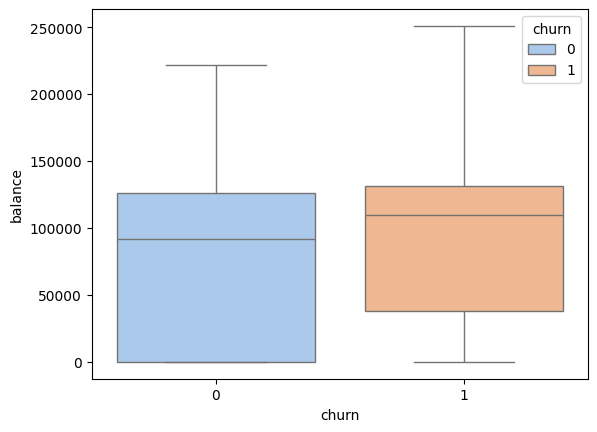

In [80]:
sns.boxplot(x='churn', y='balance', data=df, palette='pastel',hue='churn')

#### 3.3.3 Credit score v.s Churn

<Axes: xlabel='credit_score', ylabel='Count'>

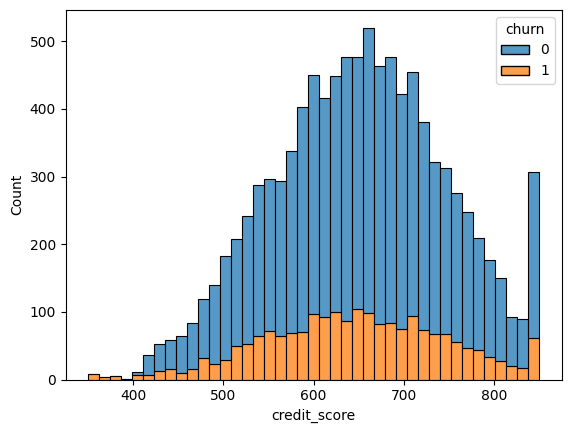

In [64]:
sns.histplot(x='credit_score', data=df, hue = 'churn',multiple='stack')

In [69]:
x_creditscore = df['credit_score']
y_churn = df['churn']
x_creditscore = sm.add_constant(x_creditscore)
logit_model_credit =sm.Logit(y_churn, x_creditscore).fit()
print(logit_model_credit.summary())

Optimization terminated successfully.
         Current function value: 0.505122
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Mar 2025   Pseudo R-squ.:               0.0007257
Time:                        17:41:38   Log-Likelihood:                -5051.2
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                  0.006757
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.9122      0.168     -5.432      0.000      -1.241      -0.583
credit_score    -0.0007

since p-value < 0.05, it shows that there is significant difference between credit_score and churn rate. The negative relationship between credit_score and churn rate implies that the lower credit score, the higher probability of churn

#### 3.3.4 Tenure v.s Churn

<Axes: xlabel='tenure', ylabel='count'>

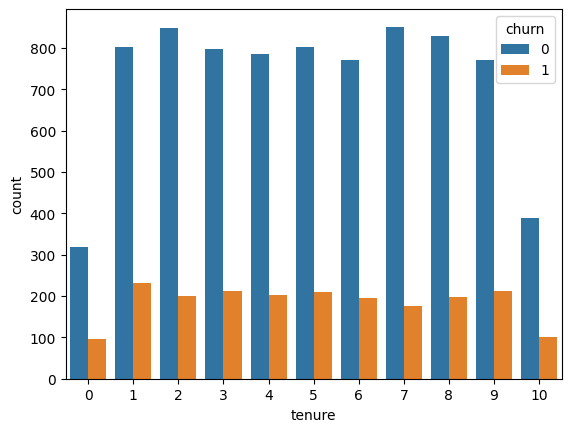

In [91]:
sns.countplot(df,x='tenure',hue='churn',stat='count')

#### 

#### 3.3.5 Products number v.s churn
    

<Axes: xlabel='products_number', ylabel='count'>

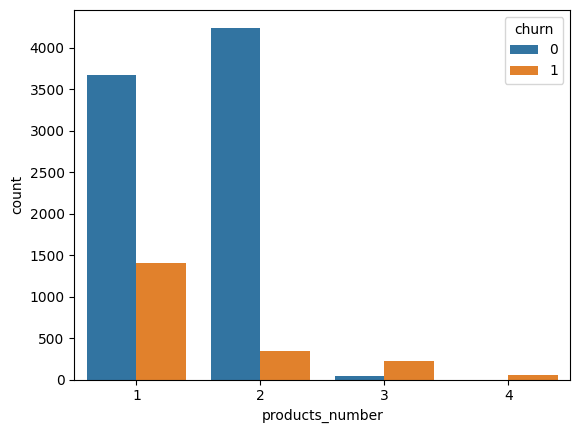

In [87]:
sns.countplot(df,x='products_number',hue='churn',stat='count')

### 4. Random Forest
From plot, it is hard to see which variables actually affect customer churn
that is, Random forest is used to choose the most important variable
#### 4.1 Processing variable


In [125]:
encoder=OneHotEncoder(sparse_output=False)
country_encoded=encoder.fit_transform(df[['country']])
country_names=encoder.get_feature_names_out(["country"])
country_encoded=pd.DataFrame(country_encoded,columns=country_names)

gender_encoded=encoder.fit_transform(df[['gender']])
gender_names=encoder.get_feature_names_out(["gender"])
gender_encoded=pd.DataFrame(gender_encoded,columns=gender_names)

df_partial=df.drop(columns=['country','gender'])
df_encoded=pd.concat([df_partial,country_encoded,gender_encoded],axis=1)
df_encoded.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0


In [139]:
# split training and testing
df_encoded=shuffle(df_encoded,random_state=42)
x = df_encoded.drop(columns=['customer_id','churn'])
y = df_encoded['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
confidence = clf.score(x_test, y_test)



0.785


             Feature  Affect_rate
1                age    24.116530
0       credit_score    14.613521
7   estimated_salary    14.491458
3            balance    14.150779
4    products_number    12.636015
2             tenure     8.317779
6      active_member     3.846807
9    country_Germany     2.174586
5        credit_card     1.895644
12       gender_Male     0.996732
8     country_France     0.948805
10     country_Spain     0.921716
11     gender_Female     0.889627


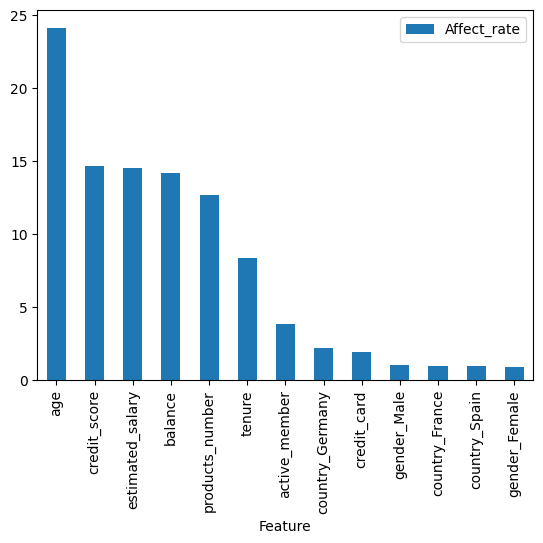

In [164]:
rf_clf=RandomForestClassifier(random_state=42)
rf_clf = rf_clf.fit(x_train, y_train)

feature_importance=rf_clf.feature_importances_
feature_importance=feature_importance*100
features=df_encoded.columns.drop(['churn','customer_id'])
feature_importance=pd.DataFrame(feature_importance)
features=pd.DataFrame(features)
feature_importance_result=pd.concat([features,feature_importance],axis=1)
feature_importance_result.columns=['Feature','Affect_rate']
feature_importance_result.sort_values('Affect_rate',ascending=False,inplace=True)
print(feature_importance_result)
importance_plot=feature_importance_result.plot.bar(stacked=True,x='Feature',y='Affect_rate')

